# Банки — Сегментация пользователей по потреблению 

**Ссылка на презентацию**  https://drive.google.com/file/d/1n5i38CUvItJEvo4q62XX2Dlsggs_v19S/view?usp=sharing

**Ссылка на дашборд:** Скину чуть позже

**Цель проекта** - сегментация пользователей банка для формирования персональных программ по работе с клиентами

*Сегментация клиентской базы — это инструмент повышения эффективности работы с клиентами путем их распределения по отдельным группам, или сегментам, в соответствии с их запросам и потребностями.*

*Сегментация клиентской базы позволяет определить уникальные подходы к каждой группе клиентов, чтобы каждый из них чувствовал, что ваше предложение адресовано лично ему.*

**Заказчик анализа** - продуктовый менеджер

*Описание данных*

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

 <h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными-и-предобработка" data-toc-modified-id="Знакомство-с-данными-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными и предобработка</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Сегментация-пользователей-банка" data-toc-modified-id="Сегментация-пользователей-банка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментация пользователей банка</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# 1. Знакомство с данными и предобработка

In [1]:
import pandas as pd
pd.set_option('max_colwidth', -1)
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
#посмотрим на размер и общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Видим, что собрана информация о 10000 клиентов, лишь у чуть больше половины из которых есть дебетовая карта или счет. Пропуски мы заполнять не будем, т.к. это может исказить данные. Наименования столбцов необходимо привести к единообразию (к нижнему регистру), тип данных во всех столбцах корректный.

In [4]:
#приведем наименования столбцов к нижнему регистру
df.columns = df.columns.str.lower() 

In [5]:
#проверим на дубликаты
df.duplicated().sum()

0

In [6]:
#посмотрим на первые 10 строк датасета
df.head(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,nan,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,nan,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
6,15635267,822,Ярославль,М,50,7,nan,2,1,1,"10,062.80",0
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0
9,15635125,684,Ярославль,М,27,2,"134,603.88",1,1,1,"71,725.73",0


In [7]:
#посмотрим на разнообразие городов
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Их всего три. Отлично! Исключили вероятность неправильного написания названий городов.

# 2. Исследовательский анализ данных

In [8]:
df.groupby('gender')['userid'].count()

gender
Ж    4543
М    5457
Name: userid, dtype: int64

In [9]:
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","6,383.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"15,733,676.57",650.53,38.92,5.01,"119,827.49",1.53,0.71,0.52,"100,090.24",0.20
std,"71,936.19",96.65,10.49,2.89,"30,095.06",0.58,0.46,0.50,"57,510.49",0.40
min,"15,608,437.00",350.00,18.00,0.00,"3,768.69",1.00,0.00,0.00,11.58,0.00
25%,"15,671,264.25",584.00,32.00,3.00,"100,181.98",1.00,0.00,0.00,"51,002.11",0.00
50%,"15,733,474.00",652.00,37.00,5.00,"119,839.69",1.00,1.00,1.00,"100,193.91",0.00
75%,"15,795,969.75",718.00,44.00,7.00,"139,512.29",2.00,1.00,1.00,"149,388.25",0.00
max,"15,858,426.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Здесь можно сделать следующие выводы:

- в датасете почти на 10% больше мужчин;
- средний возраст клиента 39 лет;
- среднее количество объектов во владении равно 5;
- баланс на счету разный - от 3769 руб. до 250898 руб. Ориентироваться на средние значения нельзя, т.к. столбец содержит 36% пропусков;
- среднее количество потребляемых банковских продуктов - не более 2х;
- кредитные карты есть лишь у 71% клиентов;
- активными клиентов банк считает лишь 52%;
- оцененный банком доход клиентов разный - от 11 рублей до 200 тысяч рублей;
- отток клиентов составляет 20%.

В предоставленных данных собрана информация о клиентах из трех городов: Ярославль (областной центр, население по данным Яндекс.Карты 601,4 тысяч человек), Рыбинск (районный центр Ярославской области, население по данным Яндекс.Карты 184,6 тысяч человек) и Ростов Великий (районный центр Ярославской области, население по данным Яндекс.Карты 30,5 тысяч человек). Так как в статусе городов и их численности населения есть значимые различия, считаю целесообразным проводить исследовательский анализ данных и дальнейшую сегментацию по каждому городу отдельно.

In [10]:
gp = df.groupby('city')
datasets = []

for city in gp.groups.keys():
    datasets.append(df.query('city == "' + city + '"'))
    
for dataset in datasets:
    display(dataset.head())
    
df_rostov_vel = datasets[0]
df_rybinsk = datasets[1]
df_yaroslavl = datasets[2]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
7,15698884,376,Ростов Великий,Ж,29,4,"115,046.74",4,1,0,"119,346.88",1
15,15686702,616,Ростов Великий,М,45,3,"143,129.41",2,0,1,"64,327.26",0
16,15780188,653,Ростов Великий,М,58,1,"132,602.88",1,1,0,"5,097.67",1
26,15779552,756,Ростов Великий,М,36,2,"136,815.64",1,1,1,"170,041.95",0
28,15771429,574,Ростов Великий,Ж,43,3,"141,349.43",1,1,1,"100,187.43",0


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
5,15616748,645,Рыбинск,М,44,8,"113,755.78",2,1,0,"149,756.71",1
11,15779909,497,Рыбинск,М,24,3,nan,2,1,0,"76,390.01",0
14,15643618,635,Рыбинск,Ж,35,7,nan,2,1,1,"65,951.65",0


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,nan,1,1,1,"101,348.88",1
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,nan,2,0,0,"93,826.63",0
6,15635267,822,Ярославль,М,50,7,nan,2,1,1,"10,062.80",0
8,15835101,501,Ярославль,М,44,4,"142,051.07",2,0,1,"74,940.50",0


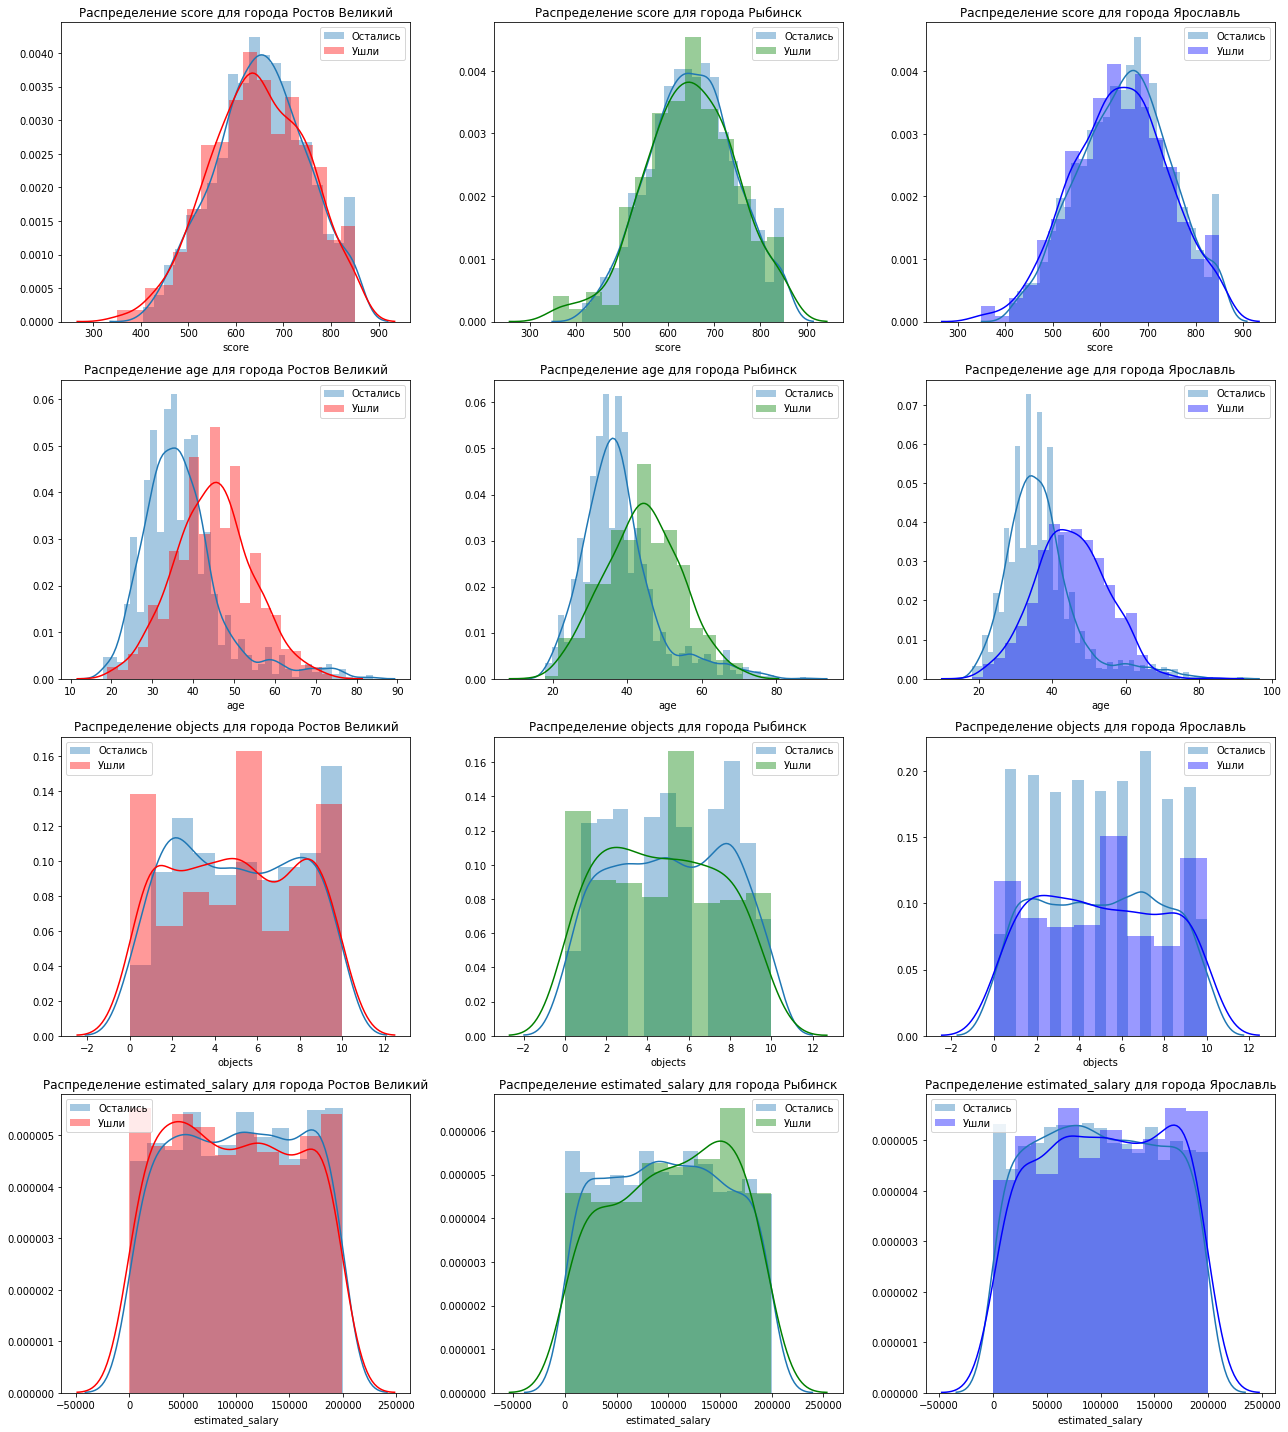

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

columns = [
    'score', 
    'age', 
    'objects', 
    'estimated_salary', 
]

colors = [
    'r',
    'g',
    'b',
]

    
for i, dataset in enumerate(datasets):
    clients_no_churn = dataset.query('churn == 0')
    clients_churn = dataset.query('churn != 0')
    
    for j, column in enumerate(columns):
        sns.distplot(clients_no_churn[column], ax = ax[j][i])
        sns.distplot(clients_churn[column], color = colors[i], ax = ax[j][i])
        ax[j][i].legend(labels = ('Остались', 'Ушли'))
        ax[j][i].set_title('Распределение ' + column + ' для города ' + dataset['city'].iloc[0])
        fig.tight_layout() 


plt.show()      

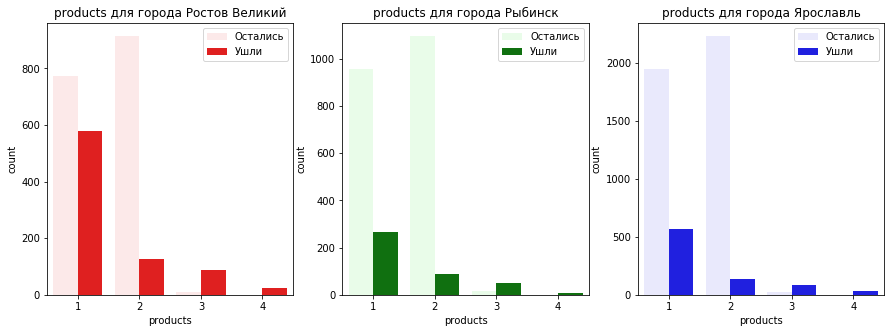

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

column = 'products'

colors = [
    'r',
    'g',
    'b',
]

    
for i, dataset in enumerate(datasets):   
    sns.countplot(dataset[column], hue = 'churn', data = dataset, ax = ax[i], color = colors[i])
    ax[i].legend(labels = ('Остались', 'Ушли'))
    ax[i].set_title(column + ' для города ' + dataset['city'].iloc[0])
        

plt.show()      

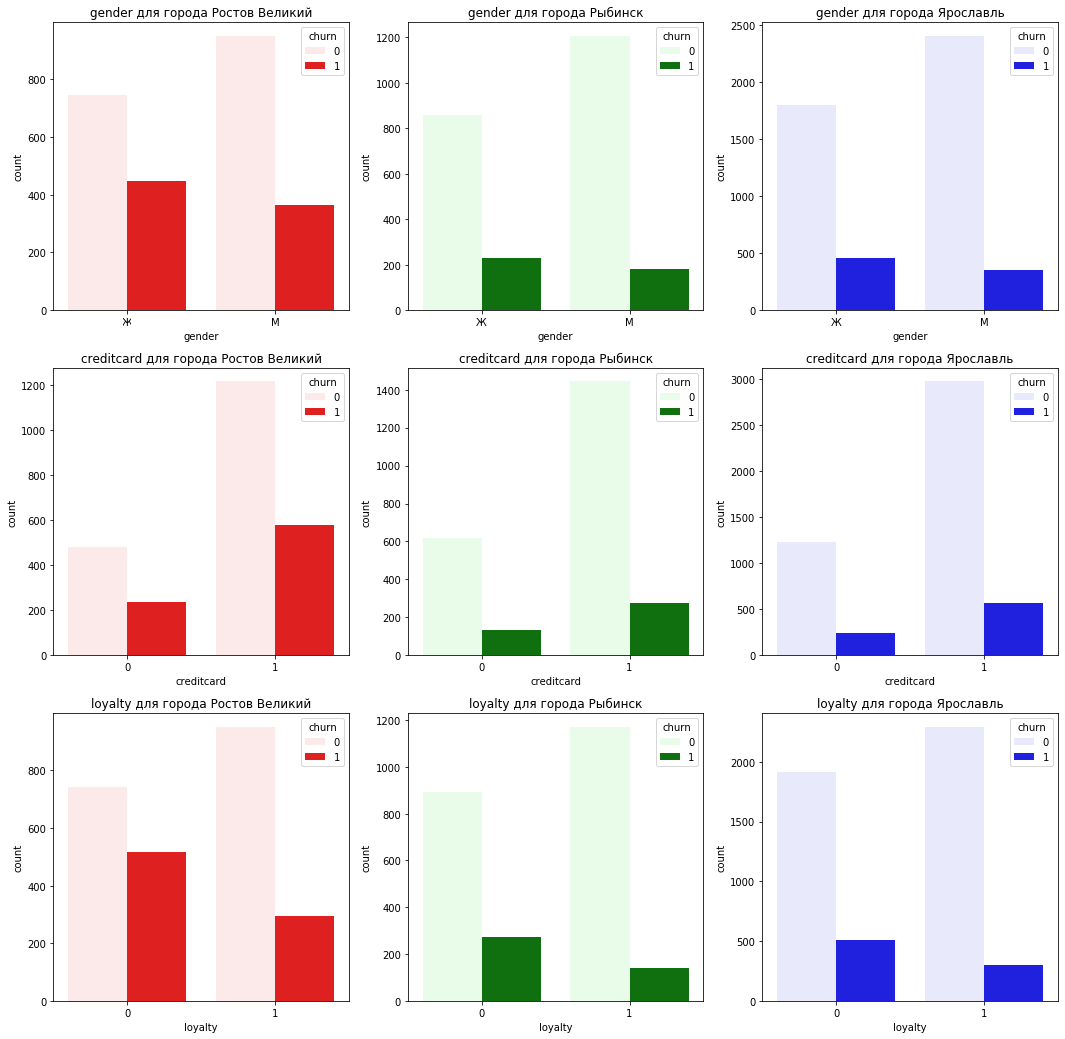

In [13]:
#посмотрим на бинарные признаки
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

columns = [
    'gender', 
    'creditcard', 
    'loyalty',
]

for i, dataset in enumerate(datasets):   
    for j, column in enumerate(columns):
        sns.countplot(x = dataset[column], hue = 'churn', data = dataset, ax = ax[j][i], color = colors[i])
        ax[j][i].set_title(column + ' для города ' + dataset['city'].iloc[0])

plt.show()

*Посмотрим на средние значения признаков двух групп - тех, кто ушел в отток, и тех, кто остался*

In [14]:
df_rostov_vel.groupby('churn').agg('mean').T.style

churn,0,1
userid,1.57342e+07,1.57314e+07
score,653.261,647.689
age,37.3115,44.8943
objects,5.0118,5.00614
balance,119427,120361
products,1.55103,1.45455
creditcard,0.716224,0.708845
loyalty,0.561652,0.363636
estimated_salary,102415,98403.9


Видно, что в Ростове Великом:
- бОльшая часть ушедших имеет возраст 45+;
- ушедшие и оставшиеся имеют примерно одинаковые баллы кредитного скоринга;
- у оставшихся и у ушедших объектов примерно одинаковое количество;
- ушедшие имели до 4х кредитных продукта, но чаще 1;
- оставшиеся имели чаще 2 продукта или 1;
- оцененный доход у ушедших немного ниже.

Среди ушедших в Рыбинске:
- женщин больше;
- владельцев кредитных карт среди ушедших в 2 раза больше;
- бОльшая часть клиентов не имела активности согласно критериям банка.

In [15]:
df_rybinsk.groupby('churn').agg('mean').T.style

churn,0,1
userid,1.57355e+07,1.57304e+07
score,652.104,647.484
age,37.8391,44.1477
objects,5.10756,4.65617
balance,119821,119792
products,1.54457,1.51332
creditcard,0.699128,0.673123
loyalty,0.567345,0.341404
estimated_salary,98602.4,103630


Видно, что в Рыбинске:
- средний возраст ушедших 44 г; 
- ушедшие и оставшиеся имеют примерно одинаковые баллы кредитного скоринга;
- у оставшихся объектов почти в 2 раза больше;
- ушедшие имели до 4х кредитных продукта,но чаще 1;
- оставшиеся имели чаще 2 продукта или 1;
- оцененный доход у ушедших немного выше.

Среди ушедших в Рыбинске:
- примерно одинаковое количество мужчин и женщин, но женщин чуть больше;
- бОльшая часть клиентов имела кредитную карту;
- бОльшая часть клиентов не имела активности согласно критериям банка.

In [16]:
df_yaroslavl.groupby('churn').agg('mean').T.style

churn,0,1
userid,1.5733e+07,1.57354e+07
score,651.162,641.915
age,37.236,45.1333
objects,5.00547,5
balance,119485,121916
products,1.54139,1.47654
creditcard,0.707422,0.702469
loyalty,0.545433,0.367901
estimated_salary,99217.1,103439


Видно, что в Ярославле:
- средний возраст ушедших 45+; 
- ушедшие и оставшиеся имеют примерно одинаковые баллы кредитного скоринга;
- у оставшихся объектов почти на 50% больше;
- ушедшие имели до 4х кредитных продукта;
- у оставшихся количество потребляемых банковских продуктов не выше 2х;
- оцененный доход у ушедших немного выше.

Среди ушедших в Ярославле:
- примерно одинаковое количество мужчин и женщин, но женщин чуть больше;
- бОльшая часть клиентов имела кредитную карту;
- бОльшая часть клиентов не имела активности согласно критериям банка.

In [17]:
cm = df.corr(method='spearman')

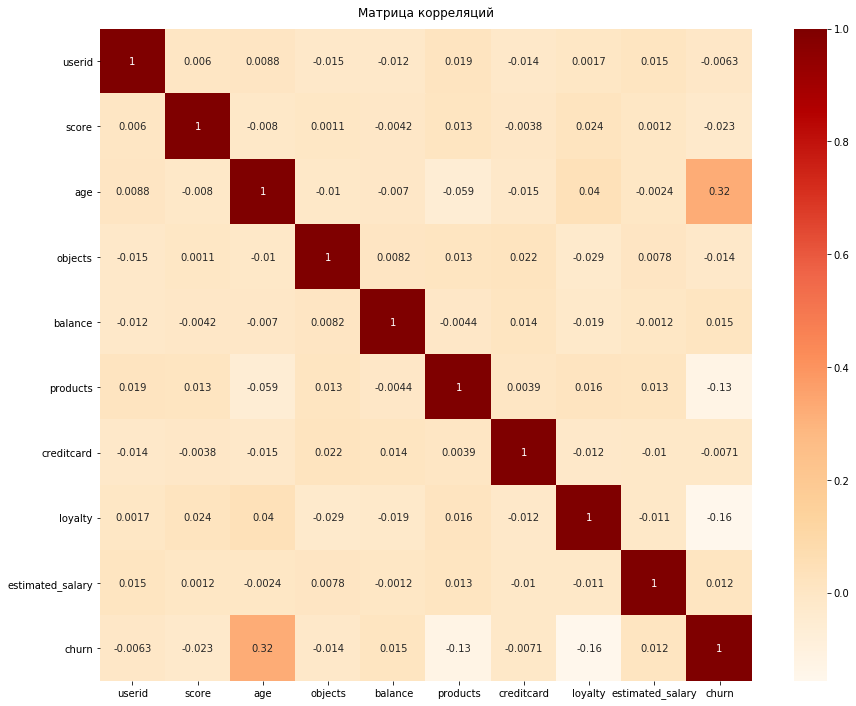

In [18]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(cm, annot=True, square=True, cmap= 'OrRd')
heatmap.set_title('Матрица корреляций', fontdict={'fontsize':12}, pad=12);

На матрице явно видны зависимости между фактом оттока и возрастом.


In [19]:
df_pivot = df.query('churn == 1').pivot_table(index='city', values = ['score', 'age', 'objects', 'balance', 'products'], aggfunc=['mean', 'median'])

In [20]:
df_pivot.T.style

# Вывод

Клиенты банка "Метанпром" в трех городах не очень-то отличаются друг от друга. Ушедшие клиенты во всех городах - это в большинстве случаев женщины возраста 44+, владельцы кредитных карт с баллами кредитного скоринга от 643 до 647. Ушедшие клиенты - владельцы чаще 5 объектов и потребители не более 2х банковских продуктов.

**2.1. Исследовательский анализ данных клиентов банка "Метанпром" г. Ярославля**

# 3. Сегментация пользователей банка

**3.1. Сегментация ушедших клиентов по потребляемым продуктам  в Ярославле** 

In [21]:
clients_churn_yaroslavl = df_yaroslavl.query('churn == 1')
clients_churn_yaroslavl.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         311
          М         253
2         Ж         82 
          М         53 
3         Ж         48 
          М         34 
4         Ж         19 
          М         10 
Name: userid, dtype: int64

In [22]:
df_yaroslavl.query('churn == 1').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      45.53 0.72        104,074.20        0.36     4.80     642.68
         М      45.08 0.71        99,675.61         0.32     5.18     643.34
2        Ж      43.79 0.63        102,623.64        0.40     5.10     645.49
         М      44.30 0.64        103,983.86        0.47     4.34     623.21
3        Ж      45.75 0.67        97,418.08         0.31     5.02     635.77
         М      44.09 0.88        122,136.29        0.44     5.44     633.03
4        Ж      47.74 0.63        116,299.36        0.63     5.95     677.42
         М      45.20 0.40        123,613.54        0.50     6.00     644.00

Из данных видно, что в Ярославле:

1. Ушедшие пользователи 1 кредитного продукта - это в большинстве своем женщины (55%) 46 лет, в 72% случаев являлись владельцами кредитных карт с оцененным доходом в 104 тыс. руб. и с довольно низкой активностью (36%), владелицы не менее 4х и не более 5 объектов и со средним баллом кредитного скоринга равным 643. Мужчины (их 45%) чуть младше, но также возраста 45+, в 71% случаев являлись владельцами кредитных карт с оцененным доходом в 100 тыс рублей, так же  с низкой активностью (в 32%), владельцы не менее 5 объектов и со средним баллом кредитного скоринга равным 643.

2. Ушедшие пользователи 2х кредитных продуктов - это в большинстве своем женщины (61%) возрастом ближе к 44 годам, в 63% случаев являлись владельцами кредитных карт с оцененным доходом в 103 тыс. руб. и с активностью 40%, владелицы не менее 5 объектов и со средним баллом кредитного скоринга равным 645. Мужчины (их 39%) чуть старше (44 г), в 64% случаев являлись владельцами кредитных карт с оцененным доходом в 104 тыс рублей, с чуть более высокой активностью в 47%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 623.

3. Ушедшие пользователи 3 кредитных продуктов - это в большинстве своем женщины (59%) 46 лет, в 67% случаев являлись владельцами кредитных карт с оцененным доходом в 97 тыс. руб. и с довольно низкой активностью (31%), владелицы 5 объектов и со средним баллом кредитного скоринга равным 636. Мужчины (их 41%) чуть младше, но также возраста 44+, в 88% случаев являлись владельцами кредитных карт с оцененным доходом в 122 тыс рублей, с более высокой активностью в 44%, владельцы  5 объектов и со средним баллом кредитного скоринга равным 633.

4. Ушедшие пользователи 4 кредитных продуктов - это в большинстве своем женщины (66%) 48 лет в 63% случаев являлись владельцами кредитных карт с оцененным доходом в 116 тыс. руб. и с довольно высокой активностью (63%), владелицы не менее 5 и не более 6 объектов и со средним баллом кредитного скоринга равным 677. Мужчины (их 34%) чуть младше, но также возхраста 45+, в 40% случаев являлись владельцами кредитных карт с оцененным доходом в 124 тыс рублей, со средней активностью (в 50%), владельцы 6 объектов и со средним баллом кредитного скоринга равным 644.

**3.2. Сегментация оставшихся клиентов по потребляемым продуктам  в Ярославле** 

In [23]:
clients_no_churn_yaroslavl = df_yaroslavl.query('churn == 0')
clients_no_churn_yaroslavl.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         805 
          М         1145
2         Ж         989 
          М         1243
3         Ж         7   
          М         15  
Name: userid, dtype: int64

In [24]:
df_yaroslavl.query('churn == 0').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      37.43 0.70        95,513.17         0.57     4.93     648.55
         М      37.37 0.72        99,397.79         0.53     4.98     650.07
2        Ж      36.83 0.70        101,135.68        0.54     4.97     651.94
         М      37.24 0.71        100,177.95        0.55     5.11     652.79
3        Ж      37.71 1.00        76,502.15         0.57     6.14     681.14
         М      42.67 0.67        88,681.22         0.67     4.27     675.20

Из данных видно, что в Ярославле:

1. Оставшиеся пользователи 1 кредитного продукта - это в большинстве своем мужчины (59%) 37 лет, в 72% случаев являются владельцами кредитных карт с оцененным доходом в 99 тыс. руб. и со средней активностью (53%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 650. Женщины (их 41%) того же возраста, в 70% случаев являются владельцами кредитных карт с оцененным доходом в 96 тыс рублей, так же со средней активностью (в 57%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 649.
2. Оставшиеся пользователи 2х кредитных продуктов - это в большинстве своем мужчины (56%) 37 лет, в 71% случаев являются владельцами кредитных карт с оцененным доходом в 100 тыс. руб. и со средней активностью (55%), владельцы 5 объектов и со средним баллом кредитного скоринга равным 653. Женщины (их 44%) чуть младше, но также возраста 35+, в 70% случаев являются владельцами кредитных карт с оцененным доходом в 101 тыс рублей, так же  со средней активностью (в 54%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 652.
3. Оставшиеся пользователи 3х кредитных продуктов - это в большинстве своем мужчины (68%) 43 лет, в 67% случаев являются владельцами кредитных карт с оцененным доходом в 89 тыс. руб. и с активностью в 67%, владельцы в среднем 4 объектов и со средним баллом кредитного скоринга равным 675. ХЖенщины (их 32%) 38 лет, в 100% случаев являются владельцами кредитных карт с оцененным доходом в 77 тыс рублей, с активностью в 57%, владельцы 6 объектов и со средним баллом кредитного скоринга равным 681.
4. Среди оставшихся клиентов потребителей 4х банковских продуктов нет.

**3.3. Сегментация ушедших клиентов по потребляемым продуктам в Рыбинске** 

In [25]:
clients_churn_rybinsk = df_rybinsk.query('churn == 1')
clients_churn_rybinsk.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         138
          М         129
2         Ж         53 
          М         34 
3         Ж         35 
          М         17 
4         Ж         5  
          М         2  
Name: userid, dtype: int64

In [26]:
df_rybinsk.query('churn == 1').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      43.34 0.69        104,989.56        0.30     4.70     646.82
         М      44.67 0.69        102,456.11        0.36     4.57     641.01
2        Ж      44.43 0.66        113,041.16        0.38     4.51     646.83
         М      46.76 0.62        83,094.02         0.29     5.29     680.15
3        Ж      42.97 0.63        116,069.04        0.37     4.80     630.29
         М      42.59 0.53        98,440.52         0.41     3.76     675.41
4        Ж      46.80 1.00        60,105.66         0.40     5.00     695.20
         М      41.00 1.00        120,398.13        0.00     4.50     517.50

Из данных видно, что в Рыбинске:

1. Ушедшие пользователи 1 кредитного продукта - это в большинстве своем женщины (52%) 43 лет, в 69% случаев являлись владельцами кредитных карт с оцененным доходом в 105 тыс. руб. и с довольно низкой активностью (30%), владелицы не менее 4х и не более 5 объектов и со средним баллом кредитного скоринга равным 647. Мужчины (их 48%) чуть старше (44г), в 69% случаев являлись владельцами кредитных карт с оцененным доходом в 102 тыс рублей, так же  с низкой активностью (в 36%), владельцы не более 5 объектов и со средним баллом кредитного скоринга равным 641.

2. Ушедшие пользователи 2х кредитных продуктов - это в большинстве своем женщины (61%) возрастом 44 года, в 66% случаев являлись владельцами кредитных карт с оцененным доходом в 113 тыс. руб. и с активностью 38%, владелицы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 647. Мужчины (их 39%) чуть старше (46 л), в 62% случаев являлись владельцами кредитных карт с оцененным доходом в 83 тыс рублей, с чуть более низкой активностью в 37%, владельцы в среднем 5 объектов и со средним баллом кредитного скоринга равным 680.

3. Ушедшие пользователи 3 кредитных продуктов - это в большинстве своем женщины (67%) 43 лет, в 63% случаев являлись владельцами кредитных карт с оцененным доходом в 116 тыс. руб. и с довольно низкой активностью (37%), владелицы 5 объектов и со средним баллом кредитного скоринга равным 630. Мужчины (их 33%) чуть младше, но также возраста 42+, в 53% случаев являлись владельцами кредитных карт с оцененным доходом в 98 тыс рублей, с более высокой активностью в 41%, владельцы не менее 3 и не более 4 объектов и со средним баллом кредитного скоринга равным 675.

4. Ушедшие пользователи 4 кредитных продуктов - это в большинстве своем женщины (71%) 47 лет в 100% случаев являлись владельцами кредитных карт с оцененным доходом в 60 тыс. руб. и с довольно низкой активностью (40%), владелицы 5 объектов и со средним баллом кредитного скоринга равным 695. Мужчины (их 29%) возраста 41г, в 100% случаев являлись владельцами кредитных карт с оцененным доходом в 120 тыс рублей, с нулевой активностью, владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 518.

**3.4. Сегментация оставшихся клиентов по потребляемым продуктам в Рыбинске** 

In [27]:
clients_no_churn_rybinsk = df_rybinsk.query('churn == 0')
clients_no_churn_rybinsk.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         378
          М         576
2         Ж         474
          М         622
3         Ж         6  
          М         8  
Name: userid, dtype: int64

In [28]:
df_rybinsk.query('churn == 0').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      38.72 0.70        99,203.29         0.62     5.04     650.74
         М      38.37 0.68        97,252.13         0.61     5.07     650.02
2        Ж      37.47 0.73        99,137.63         0.53     5.12     655.47
         М      37.19 0.69        99,567.73         0.53     5.15     652.24
3        Ж      36.17 0.50        61,113.05         0.33     5.50     670.50
         М      31.88 0.62        88,772.21         0.75     6.50     642.25

Из данных видно, что в Рыбинске:

1. Оставшиеся потребители 1 кредитного продукта - это в большинстве своем мужчины (60%) 38 лет, в 68% случаев являются владельцами кредитных карт с оцененным доходом в 97 тыс. руб. и с активностью  в 61%, владельцы в среднем 5 объектов и со средним баллом кредитного скоринга равным 650. Женщины (их 40%) чуть старше, но также возраста 38+, в 70% случаев являются владельцами кредитных карт с оцененным доходом в 99 тыс рублей, так же с активностью в 62%, владелицы в среднем 5 объектов и со средним баллом кредитного скоринга равным 651.
2. Оставшиеся пользователи 2х кредитных продуктов - это в большинстве своем мужчины (57%) 37 лет, в 69% случаев являются владельцами кредитных карт с оцененным доходом в 100 тыс. руб. и с активностью 53%, владельцы в среднем 5 Х объектов и со средним баллом кредитного скоринга равным 652. Женщины (их 43%) чуть старше, но также возраста 37+, в 73% случаев являются владельцами кредитных карт с оцененным доходом в 99 тыс рублей, так же  со средней активностью (в 53%), владелицы не менее 5 объектов и со средним баллом кредитного скоринга равным 655.
3. Оставшиеся пользователи 3х кредитных продуктов - это в большинстве своем мужчины (57%) 32 лет, в 62% случаев являются владельцами кредитных карт с оцененным доходом в 89 тыс. руб. и с высокой активностью (75%), владельцы не менее 6 и не более 7 объектов и со средним баллом кредитного скоринга равным 642. Женщины (их 43%) чуть старше (36+), в 50% случаев являются владельцами кредитных карт с оцененным доходом в 61 тыс рублей, с низкой активностью (в 33%), владелицы не менее 5 и не более 6 объектов и со средним баллом кредитного скоринга равным 671.
4. Среди оставшихся клиентов потребителей 4х банковских продуктов нет.

**3.5. Сегментация ушедших клиентов по потребляемым продуктам  в Ростове Великом** 

In [29]:
clients_churn_rostov_vel = df_rostov_vel.query('churn == 1')
clients_churn_rostov_vel.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         313
          М         265
2         Ж         75 
          М         51 
3         Ж         46 
          М         40 
4         Ж         14 
          М         10 
Name: userid, dtype: int64

In [30]:
df_rostov_vel.query('churn == 1').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      44.58 0.69        100,083.03        0.35     5.12     654.78
         М      45.34 0.70        95,038.20         0.35     4.79     642.55
2        Ж      45.91 0.77        93,617.12         0.44     5.21     641.00
         М      43.41 0.71        104,773.46        0.29     4.94     637.96
3        Ж      45.26 0.72        111,405.17        0.41     4.80     647.39
         М      44.23 0.75        95,040.20         0.40     5.72     655.30
4        Ж      43.07 0.71        91,166.29         0.29     4.29     623.29
         М      46.30 0.80        102,234.76        0.60     5.10     666.70

Из данных видно, что в Ростове Великом:

1. Ушедшие потребители 1 кредитного продукта - это в большинстве своем женщины (54%) 45 лет, в 69% случаев являлись владелицами кредитных карт с оцененным доходом в 100 тыс. руб. и с довольно низкой активностью (35%), владелицы в среднем 5 объектов и со средним баллом кредитного скоринга равным 6543. Мужчины (их 46%) чуть старше, но также возраста 45+, в 70% случаев являлись владельцами кредитных карт с оцененным доходом в 95 тыс рублей, так же  с низкой активностью (в 35%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 643.

2. Ушедшие пользователи 2х кредитных продуктов - это в большинстве своем женщины (60%) возрастом ближе к 46 годам, в 77% случаев являлись владельцами кредитных карт с оцененным доходом в 93 тыс. руб. и с активностью 44%, владелицы не менее 5 объектов и со средним баллом кредитного скоринга равным 641. Мужчины (их 40%) чуть младше (43 г), в 71% случаев являлись владельцами кредитных карт с оцененным доходом в 105 тыс рублей, с чуть более высокой активностью в 41%, владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 638.

3. Ушедшие потребители 3 кредитных продуктов - это в большинстве своем женщины (53%) 45 лет, в 72% случаев являлись владельцами кредитных карт с оцененным доходом в 111 тыс. руб. и с довольно низкой активностью (41%), владелицы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 647. Мужчины (их 47%) чуть младше, но также возраста 44+, в 75% случаев являлись владельцами кредитных карт с оцененным доходом в 95 тыс рублей, с такой же активностью в 40%, владельцы  не менее 5 объектов и со средним баллом кредитного скоринга равным 655.

4. Ушедшие пользователи 4 кредитных продуктов - это в большинстве своем женщины (58%) 43 лет в 71% случаев являлись владельцами кредитных карт с оцененным доходом в 91 тыс. руб. и с довольно низкой активностью (29%), владелицы в среднем 4х объектов и со средним баллом кредитного скоринга равным 623. Мужчины (их 42%) чуть старше (46 лет), в 80% случаев являлись владельцами кредитных карт с оцененным доходом в 102 тыс рублей, со средней активностью (в 60%), владельцы 5 объектов и со средним баллом кредитного скоринга равным 667.

**3.6. Сегментация оставшихся клиентов по потребляемым продуктам  в Ростове Великом** 

In [31]:
clients_no_churn_rostov_vel = df_rostov_vel.query('churn == 0') 
clients_no_churn_rostov_vel.groupby(['products', 'gender'])['userid'].count()

products  gender
1         Ж         351
          М         420
2         Ж         387
          М         527
3         Ж         7  
          М         3  
Name: userid, dtype: int64

In [32]:
df_rostov_vel.query('churn == 0').pivot_table(index=['products', 'gender'], values=['score', 'age', 'objects', 'creditcard', 'loyalty', 'estimated_salary'], aggfunc='mean')

age  creditcard  estimated_salary  loyalty  objects  score
products gender                                                             
1        Ж      37.18 0.72        108,600.36        0.52     5.03     654.17
         М      37.41 0.71        99,186.50         0.58     5.04     652.16
2        Ж      37.57 0.69        98,916.77         0.53     4.82     654.47
         М      37.20 0.73        102,883.91        0.59     5.16     652.21
3        Ж      33.29 0.86        152,975.72        0.71     2.57     674.71
         М      35.67 1.00        81,450.05         0.33     4.33     680.67

Из данных видно, что в Ростове Великом:

1. Оставшиеся пользователи 1 кредитного продукта - это в большинстве своем мужчины (54%) 37 лет, в 71% случаев являются владельцами кредитных карт с оцененным доходом в 99 тыс. руб. и со средней  активностью (58%), владельцы 5 объектов и со средним баллом кредитного скоринга равным 652. Женщины (их 46%) того же также возраста, в 72% случаев являются владельцами кредитных карт с оцененным доходом в 109 тыс рублей, так же  с активностью в 52%, владелицы 5 объектов и со средним баллом кредитного скоринга равным 654.
2. Оставшиеся пользователи 2х кредитных продуктов - это в большинстве своем мужчины (58%) 37 лет, в 73% случаев являются владельцами кредитных карт с оцененным доходом в 103 тыс. руб. и со средней активностью (59%), владельцы 5 объектов и со средним баллом кредитного скоринга равным 652. Женщины (их 42%) того же возраста, в 69% случаев являются владельцами кредитных карт с оцененным доходом в 99 тыс рублей, так же  с активностью в 53%, владелицы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 654.
3. Оставшиеся пользователи 3х кредитных продуктов - это в большинстве своем женщины (70%) 33 лет, в 86% случаев являются владельцами кредитных карт с оцененным доходом в 153 тыс. руб. и с высокой активностью (71%), владелицы не менее 2 и не более 3 объектов и со средним баллом кредитного скоринга равным 675. Мужчины (их 30%) чуть старше - возраста 36 лет, в 100% случаев являются владельцами кредитных карт с оцененным доходом в 81 тыс рублей, с низкой активностью (в 33%), владельцы не менее 4 и не более 5 объектов и со средним баллом кредитного скоринга равным 681.
4. Среди оставшихся клиентов потребителей 4х банковских продуктов нет.

**Общий вывод:**

1. Среди оставшихся клиентов банка "Метанпром" в трех городах нет потребителей 4х продуктов.
2. Ушедшие клиенты в трех городах в основном женщины.
3. Возраст ушедших клиентов в трех городах на десяток лет выше тех, кто остался.

# 4. Проверка гипотез

**Задание**

*1. Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*

*2. Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*

Нулевая гипотеза будет о том, что средний доход клиентов, которые пользуются двумя продуктами банка, и тех, кто пользуется одним, равен друг другу. Альтернативной гипотезой будет наша гипотеза "Средний доход различен между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним."

Следуя логике всего проекта, проверю гипотезы (предложенную и свою) в разрезе городов.

Так как в данных есть выбросы, применим U-критерий Манна-Уитни

**4.1.1. Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, в Ярославле.**

In [33]:
#создадим датасеты по количеству потребляемых продуктов (1 и 2) из оставшихся клиентов
clients_no_churn_yaroslavl_1 = clients_no_churn_yaroslavl.query('products == 1')
clients_no_churn_yaroslavl_2 = clients_no_churn_yaroslavl.query('products == 2')

In [34]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_no_churn_yaroslavl_1['estimated_salary'], clients_no_churn_yaroslavl_2['estimated_salary'])
print('p-значение: ', results.pvalue)

p-значение:  0.05730359952887783


In [35]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних доходов наших выборок. Р-value больше alpha говорит нам о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия дохода между теми клиентами в Ярославле, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, НЕ ПОДТВЕРДИЛАСЬ.

**4.1.2. Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, в Рыбинске.**

In [36]:
#создадим датасеты по количеству потребляемых продуктов: 1 и 2
clients_no_churn_rybinsk_1 = clients_no_churn_rybinsk.query('products == 1')
clients_no_churn_rybinsk_2 = clients_no_churn_rybinsk.query('products == 2')

In [37]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_no_churn_rybinsk_1['estimated_salary'], clients_no_churn_rybinsk_2['estimated_salary'])
print('p-значение: ', results.pvalue)

p-значение:  0.29051838079889736


In [38]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних доходов наших выборок. Р-value больше alpha говорит нам о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия дохода между теми клиентами в Рыбинске, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, НЕ ПОДТВЕРДИЛАСЬ.

**4.1.3. Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, в Ростове Великом.**

In [39]:
#создадим датасеты по количеству потребляемых продуктов: 1 и 2
clients_no_churn_rostov_vel_1 = clients_no_churn_rostov_vel.query('products == 1')
clients_no_churn_rostov_vel_2 = clients_no_churn_rostov_vel.query('products == 2')

In [40]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_no_churn_rostov_vel_1['estimated_salary'], clients_no_churn_rostov_vel_2['estimated_salary'])
print('p-значение: ', results.pvalue)

p-значение:  0.21386341886864302


In [41]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних доходов наших выборок. Р-value больше alpha говорит нам о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия дохода между теми клиентами в Ростове Великом, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, НЕ ПОДТВЕРДИЛАСЬ.

**4.2.1. Проверим гипотезу различия среднего значения кредитного скоринга между теми клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним,  в Ярославле.**

Нулевая гипотеза будет о том, что среднее значение кредитного скоринга ушедших клиентов, которые пользовались двумя продуктами банка, и тех, кто пользовались одним, равен друг другу. Альтернативной гипотезой будет гипотеза "Среднее значение кредитного скоринга различен между теми ушедшими клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним."

In [42]:
#создадим датасеты по количеству потребляемых продуктов (1 и 2) из ушедших клиентов
clients_churn_yaroslavl_1 = clients_churn_yaroslavl.query('products == 1') 
clients_churn_yaroslavl_2 = clients_churn_yaroslavl.query('products == 2')

In [43]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_churn_yaroslavl_1['score'], clients_churn_yaroslavl_2['score'])
print('p-значение: ', results.pvalue)

p-значение:  0.22606949568583895


In [44]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних значений кредитного скоринга наших выборок. Р-value больше alpha говорит о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия средних значений кредитного скоринга между теми клиентами в Ярославле, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, НЕ ПОДТВЕРДИЛАСЬ.

**4.2.2. Проверим гипотезу различия среднего значения кредитного скоринга между теми клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, в Рыбинске.**

In [45]:
#создадим датасеты по количеству потребляемых продуктов (1 и 2) из ушедших клиентов
clients_churn_rybinsk_1 = clients_churn_rybinsk.query('products == 1') 
clients_churn_rybinsk_2 = clients_churn_rybinsk.query('products == 2')

In [46]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_churn_rybinsk_1['score'], clients_churn_rybinsk_2['score'])
print('p-значение: ', results.pvalue)

p-значение:  0.1281511899591639


In [47]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних значений кредитного скоринга наших выборок. Р-value больше alpha говорит о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия средних значений кредитного скоринга между теми клиентами в Рыбинске, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, НЕ ПОДТВЕРДИЛАСЬ.

**4.2.3. Проверим гипотезу различия среднего значения кредитного скоринга между теми клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, в Ростове Великом.**

In [48]:
#создадим датасеты по количеству потребляемых продуктов (1 и 2) из ушедших клиентов
clients_churn_rostov_vel_1 = clients_churn_rostov_vel.query('products == 1') 
clients_churn_rostov_vel_2 = clients_churn_rostov_vel.query('products == 2')

In [49]:
alpha = 0.05 # критический уровень статистической значимости
results = st.mannwhitneyu(clients_churn_rostov_vel_1['score'], clients_churn_rostov_vel_2['score'])
print('p-значение: ', results.pvalue)

p-значение:  0.2650796139013878


In [50]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нулевой гипотезой была гипотеза о равенстве средних значений кредитного скоринга наших выборок. Р-value больше alpha говорит о том, вероятность случайного совпадения средних наших выборок велика. 

**Вывод**

Гипотеза различия средних значений кредитного скоринга между теми клиентами в Ростове Великом, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, НЕ ПОДТВЕРДИЛАСЬ.

# Общий вывод

1. Гипотеза различия дохода между теми клиентами во всех трех городах, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не подтвердилась.

2. Гипотеза различия средних значений кредитного скоринга между теми клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, во всех трех городах не подтвердилась.

# 5. Выводы и рекомендации

**5.1. Выводы**

5.1.1. Исследовательский анализ данных клиентов банка "Метанпром" показал, что:
1. В датасете почти на 10% больше мужчин;
2. Средний возраст клиента 39 лет;
3. Среднее количество объектов во владении равно 5;
4. Среднее количество потребляемых банковских продуктов - не более 2х;
5. Кредитные карты есть у 71% клиентов;
6. Активными клиентов банк считает лишь 52%;
7. Отток клиентов составляет 20%;
8. Средний возраст оставшихся клиентов 37-38 лет;
9. Средний возраст ушедших клиентов 44-45 лет;
10. Ушедшие и оставшиеся клиенты имеют примерно одинаковые баллы кредитного скоринга;
11. Ушедшие клиенты имели до 4х кредитных продукта;
12. У оставшихся клиентов количество потребляемых банковских продуктов не выше 2х;
13. У ушедших клиентов Ярославля и Рыбинска оцененный доход был немного выше дохода оставшихся. В Ростове Великом картина наоборот - у оставшихся оцененный доход выше;
14. В данных о клиентах существует зависимость между возрастом и фаактом оттока и возрастом и активностью клиента.
15. Зависимостей между фактом оттока и балансом или фактом оттока и количесва потребляемых банковских продуктов нет.

5.1.2. Сегментация пользователей банка позволила сформировать "портреты" оставшихся и ушедших клиентов. А именно:
 
 *Ушедшие клиенты с 1 банковским продуктом* - это в основном женщины возраста 44 года со средней зарплатой в 102 тысячи рублей, в 70% случаев являлись держателями кредитных карт, с довольно низкой активностью (34%), владелицы 5 объектов со средним кредитным скорингом 648.
 
 *Ушедшие клиенты с 2 банковскими продуктами* - это в основном женщины возраста 45 лет со средней зарплатой в 103 тысячи рублей, в 69% случаев являлись держателями кредитных карт, с довольно низкой активностью (41%), владелицы чаще 5 объектов со средним кредитным скорингом 644.
 
 *Ушедшие клиенты с 3 банковскими продуктами* - это в основном женщины возраста 45 лет со средней зарплатой в 108 тысяч рублей, в 67% случаев являлись держателями кредитных карт, с довольно низкой активностью (36%), владелицы чаще 5 объектов со средним кредитным скорингом 638.
 
 *Ушедшие клиенты с 4 банковскими продуктами* - это в основном женщины возраста 46 лет со средней зарплатой в 89 тысячи рублей, в 78% случаев являлись держателями кредитных карт, с довольно низкой активностью (44%), владелицы 5 объектов со средним кредитным скорингом 665.
 
 *Оставшиеся клиенты с 1 и 2 банковскими продуктами* - это в основном мужчины возраста 37 лет со средней зарплатой в 100 тысяч рублей, в 70% случаев являются держателями кредитных карт, с активностью выше среднего (57%), владельцы 5 объектов и со средним кредитным скорингом 651.
 
 *Оставшиеся клиенты с 3 банковскими продуктами* в разных городах разные. Так, 
 - в Ярославле это в основном мужчины возраста 43 года со средней зарплатой в 89 тысяч рублей, в 69% случаев являются держателями кредитных карт, с активностью выше среднего (67%), владельцы 4 объектов и со средним кредитным скорингом 675.
 - в Рыбинске это в основном мужчины возраста 32 года со средней зарплатой в 89 тысяч рублей, в 62% случаев являются держателями кредитных карт, с высокой активностью (75%), владельцы от 6 до 7 объектов и со средним кредитным скорингом 642.
 - в Ростове Великом это в основном женщины возраста 33 года со средней зарплатой в 153 тысяч рублей, в 86% случаев являются держателями кредитных карт, с высокой активностью (71%), владелицы от 2 до 3 объектов и со средним кредитным скорингом 675.
 
 
 *Оставшихся клиентов с 4 банковскими продуктами* в трех городах нет.

5.1.3. Проверка гипотез показала, что:
- гипотеза различия дохода между теми клиентами во всех трех городах, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не подтвердилась.
- гипотеза различия средних значений кредитного скоринга между теми клиентами, которые пользовались двумя продуктами банка, и теми, которые пользовались одним, во всех трех городах не подтвердилась.

**5.2. Рекомендации**

1. Поддерживать оставшихся клиентов дополнительными "плюшками", удерживая их активность на том же высоком уровне, такими как: повышенный кэшбэк по дебетовой карте, увличеснный льготный период или пониженная ставка или ранжированная ставка по кредитной карте.
2. Продумать политику банка по расширению количества потребляемых продуктов до 4х в отношении оставшихся, например, предложить услуги страхования, открытия инвест счета или копилки, пенсионные или зарплатные проекты, или пакет услуг, связанный с дебетовой или кредитной картами.
3. Разработать программу по возвращению ушедших, например, ушедшим женщинам, а они более старшего возраста, предложить повышенные ставки на вклады для детей, "копилку" на пенсию, пенсионный проект, страхование жизни/здоровья себя и близких и пр.
4. Вновь пришедшим клиентам предлагать персональную программу взаимодействия с банком (на основании вводных данных клиента), т.е. расширить спектр услуг.